In [3]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df = pd.read_csv('L5_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,5,2024-04-21 16:32:01.000,0.00,1004.53,33.80,52.77,27306.25,234.75
1,5,2024-04-21 16:32:57.000,1.74,1004.50,34.08,51.42,40567.50,332.46
2,5,2024-04-21 16:33:57.000,0.96,1004.54,34.22,51.05,27715.00,94.14
3,5,2024-04-21 16:34:57.000,2.18,1004.49,34.04,51.10,29259.17,111.05
4,5,2024-04-21 16:35:57.000,1.48,1004.53,34.20,51.05,34108.33,196.04
...,...,...,...,...,...,...,...,...
55152,5,2024-07-19 06:11:07.000,0.70,1005.29,36.54,60.19,4668.33,2.84
55153,5,2024-07-19 06:12:07.000,2.09,1005.31,36.73,59.34,4699.17,2.86
55154,5,2024-07-19 06:13:07.000,0.00,1005.35,37.07,58.28,4720.83,2.86
55155,5,2024-07-19 06:14:07.000,0.00,1005.37,37.56,57.32,4745.00,2.86


In [6]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,55157.0,55157.000000,55157.000000,55157.000000,55157.000000,55157.000000,55157.000000
mean,5.0,1.056450,1004.854431,35.966260,56.653411,31034.162533,351.780217
std,0.0,1.071567,3.241098,8.952279,27.233041,34980.280429,536.045697
min,5.0,0.000000,997.810000,19.920000,12.880000,20.000000,0.000000
25%,5.0,0.000000,1002.650000,28.250000,30.930000,5323.330000,4.810000
50%,5.0,0.780000,1004.660000,34.880000,52.120000,15417.500000,64.680000
75%,5.0,1.740000,1006.740000,43.660000,82.270000,46233.590000,441.730000
max,5.0,8.450000,1014.950000,56.800000,100.000000,117758.200000,2345.520000


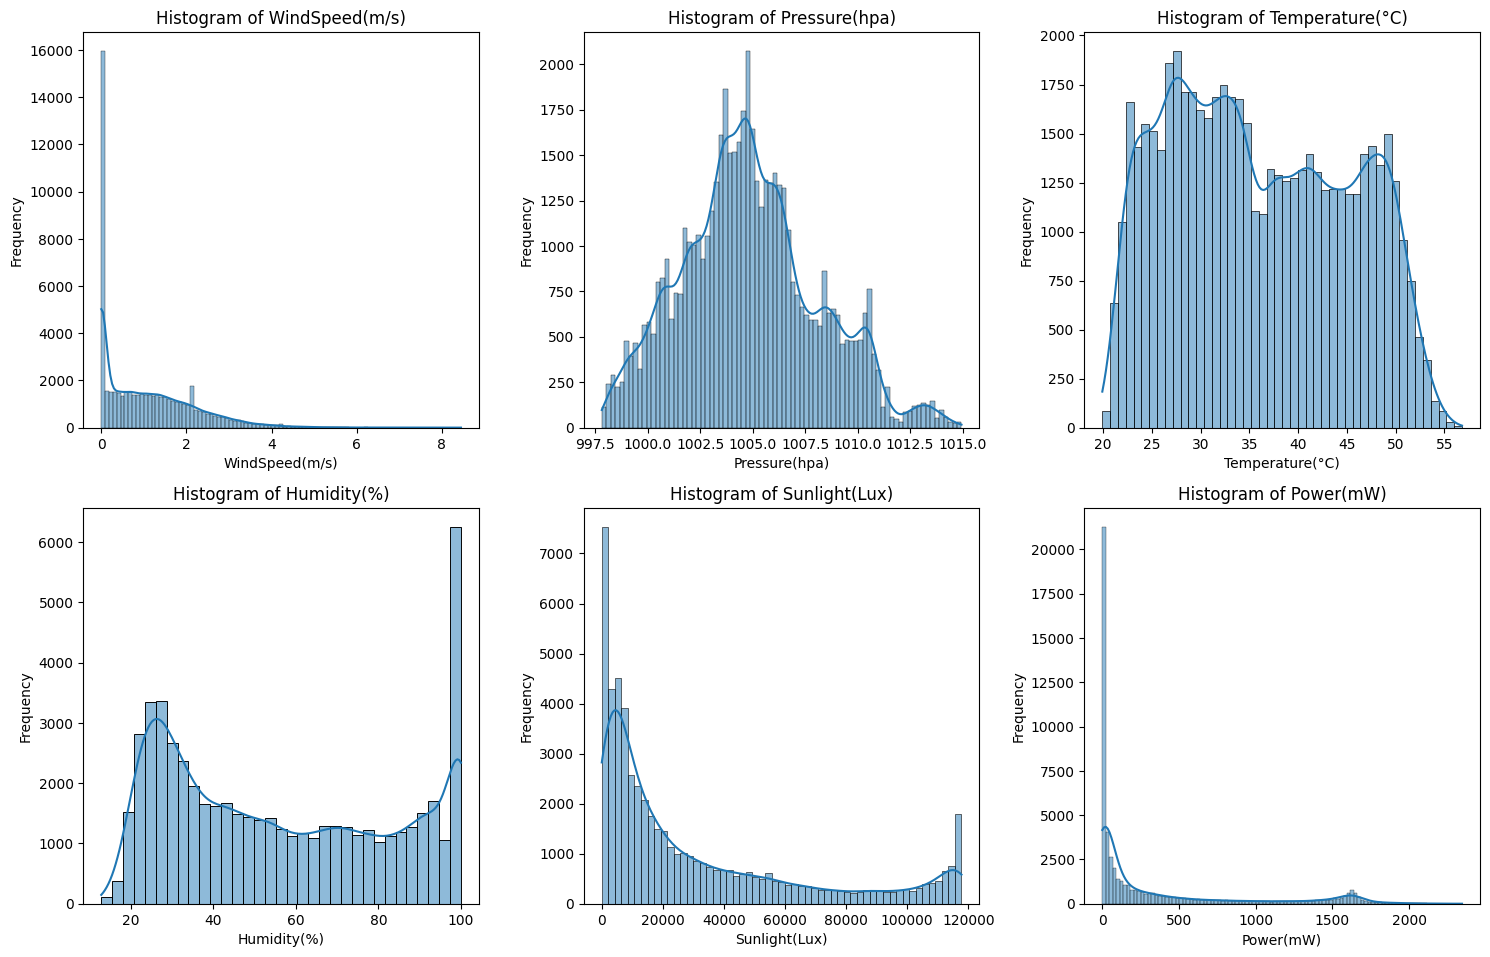

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
502,5,2024-04-22 11:31:57.000,0.70,1004.18,45.84,24.49,117758.2,1379.72
503,5,2024-04-22 11:32:57.000,1.05,1004.18,46.30,23.57,117758.2,1438.69
504,5,2024-04-22 11:33:57.000,0.35,1004.14,46.91,23.20,117758.2,1349.68
505,5,2024-04-22 11:34:57.000,1.48,1004.12,46.84,22.61,117758.2,1342.32
508,5,2024-04-22 11:37:57.000,1.22,1004.13,46.72,23.12,117758.2,1260.46
...,...,...,...,...,...,...,...,...
53999,5,2024-07-17 14:53:07.000,0.87,1004.91,49.40,23.73,117758.2,1644.46
54000,5,2024-07-17 14:54:07.000,2.61,1004.83,49.08,23.86,117758.2,1614.05
54001,5,2024-07-17 14:55:07.000,1.57,1004.86,49.44,23.46,117758.2,1636.68
54002,5,2024-07-17 14:56:07.000,0.35,1004.90,50.04,22.74,117758.2,1629.85


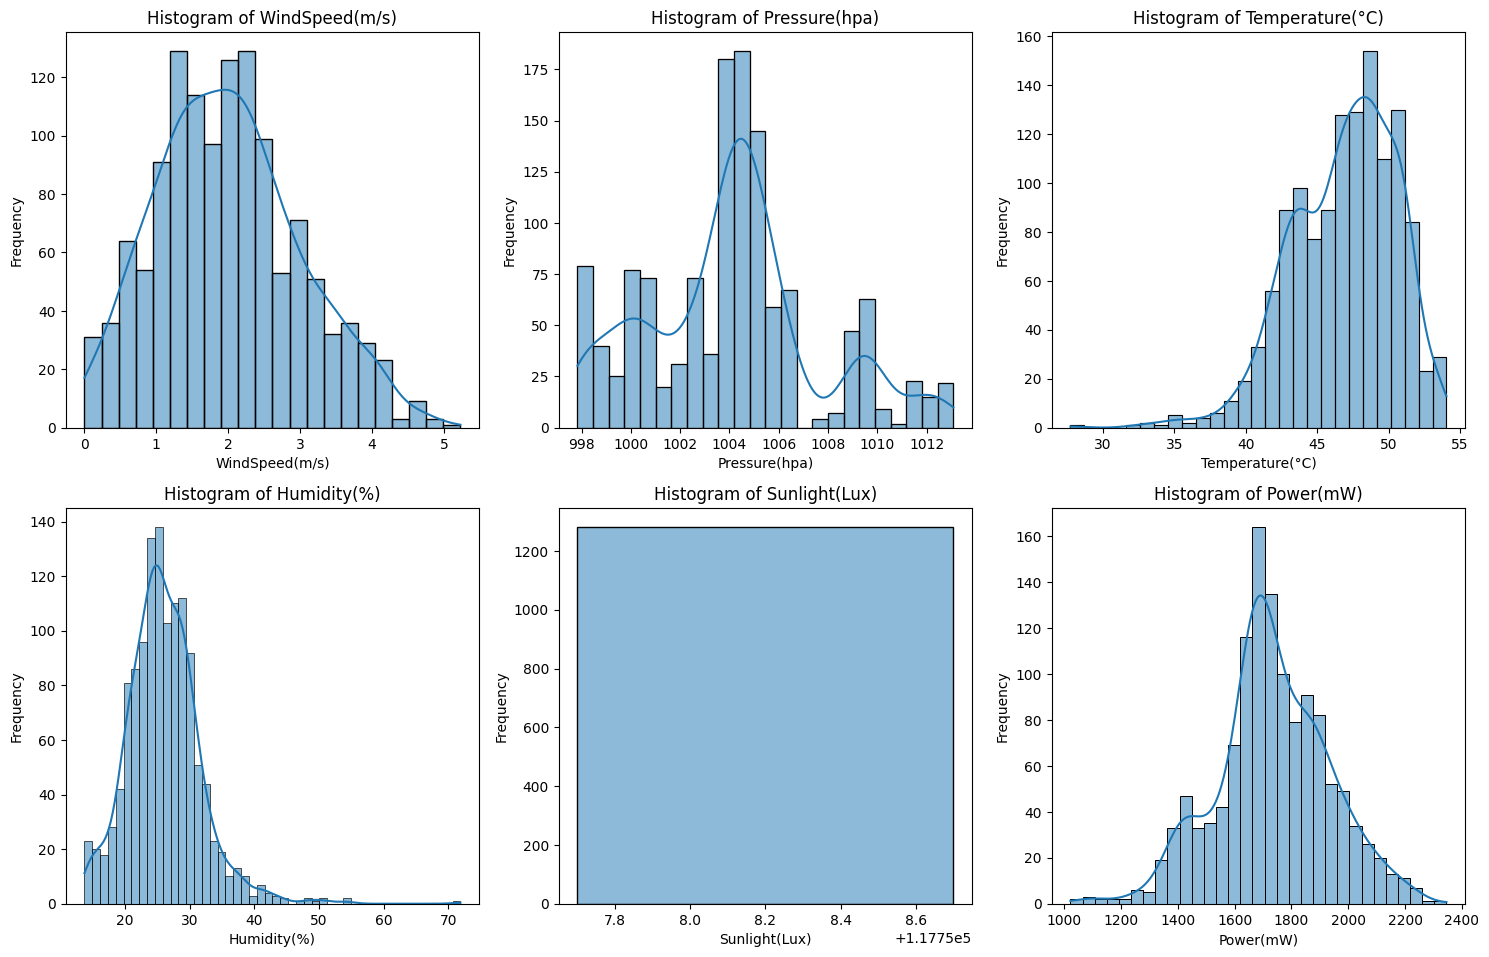

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [11]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0147 * Sunlight(Lux) + -105.7808


In [12]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0147
intercept = -105.7808

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [13]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,55157.0,55157.000000,55157.000000,55157.000000,55157.000000,55157.000000,55157.000000
mean,5.0,1.056450,1004.854431,35.966260,56.653411,31204.787964,351.780217
std,0.0,1.071567,3.241098,8.952279,27.233041,35478.203280,536.045697
min,5.0,0.000000,997.810000,19.920000,12.880000,20.000000,0.000000
25%,5.0,0.000000,1002.650000,28.250000,30.930000,5323.330000,4.810000
50%,5.0,0.780000,1004.660000,34.880000,52.120000,15417.500000,64.680000
75%,5.0,1.740000,1006.740000,43.660000,82.270000,46233.590000,441.730000
max,5.0,8.450000,1014.950000,56.800000,100.000000,166755.156463,2345.520000


In [14]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [15]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240421163205,1.07,1004.55,34.17,51.11,30057.96,148.97
1,20240421164105,1.24,1004.63,34.21,50.85,25014.25,89.45
2,20240421165105,0.72,1004.70,33.77,52.20,18326.50,40.18
3,20240421170105,0.88,1004.73,32.52,55.16,10809.00,14.44
4,20240421171105,0.67,1004.76,31.27,59.11,5464.92,3.64
...,...,...,...,...,...,...,...
5511,20240719052905,0.13,1005.04,29.04,98.74,1958.33,0.77
5512,20240719053905,0.31,1005.15,30.62,90.24,3003.50,1.51
5513,20240719054905,0.25,1005.18,30.09,91.66,3528.08,2.01
5514,20240719055905,0.71,1005.23,33.95,73.04,4328.67,2.54


In [16]:
df.describe()

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,5.516000e+03,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000
mean,2.024058e+13,1.056432,1004.854465,35.966284,56.653472,31203.345270,351.761164
std,9.333929e+07,0.884379,3.239992,8.930971,27.173435,34542.747406,514.066633
min,2.024042e+13,0.000000,997.860000,19.990000,14.270000,24.750000,0.000000
25%,2.024051e+13,0.290000,1002.650000,28.290000,31.000000,5398.935000,5.060000
50%,2.024060e+13,0.910000,1004.660000,34.875000,52.175000,15537.790000,68.790000
75%,2.024063e+13,1.610000,1006.740000,43.660000,82.090000,48236.527500,501.035000
max,2.024072e+13,5.010000,1014.910000,55.690000,100.000000,135673.800000,1897.610000


# HEATMAP

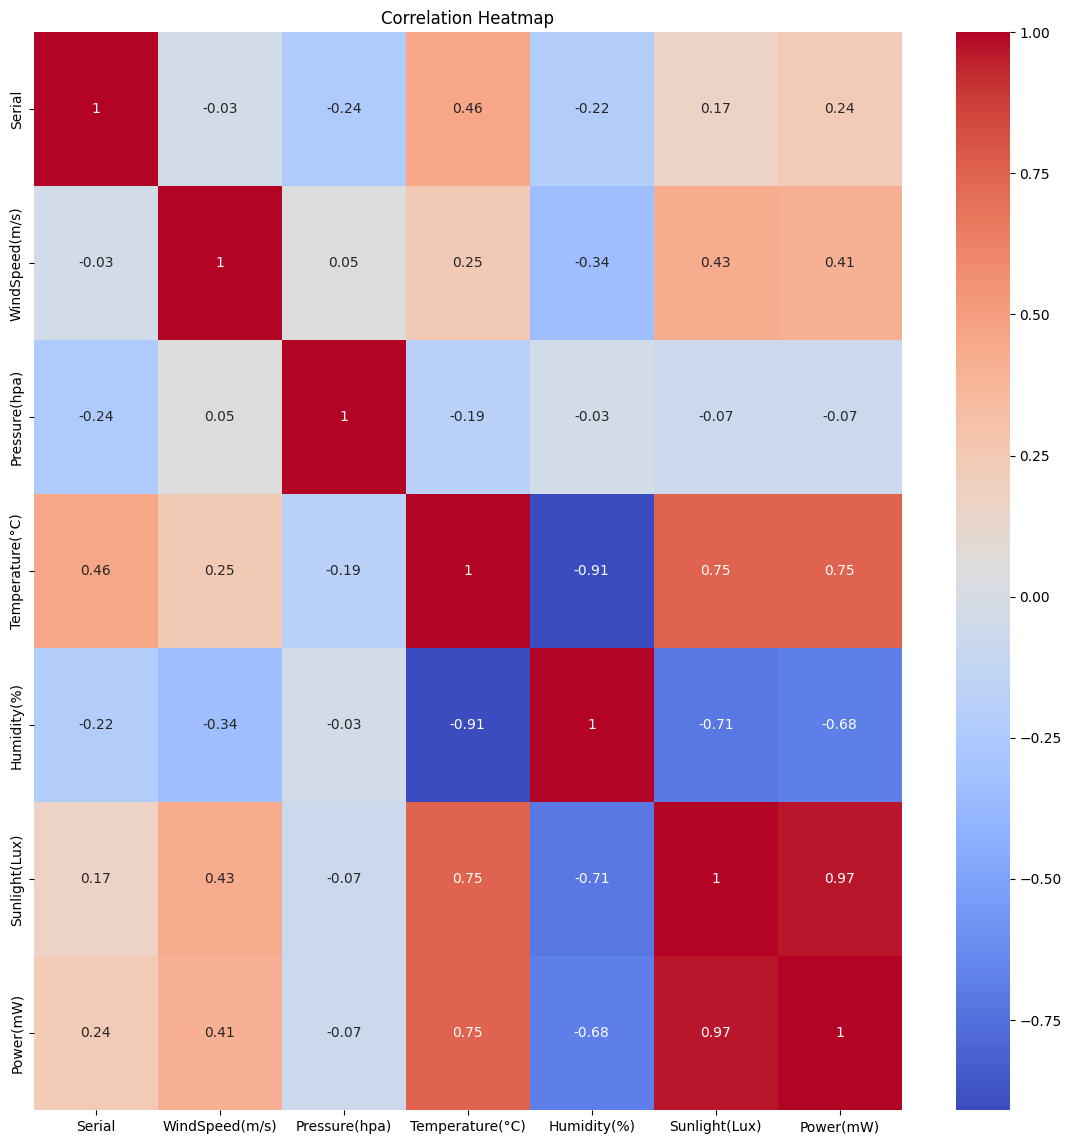

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.974437
Temperature(°C)    0.753174
Humidity(%)        0.684063
WindSpeed(m/s)     0.414299
Serial             0.236816
Pressure(hpa)      0.067857
Name: Power(mW), dtype: float64

In [19]:
df.to_csv('L5_Train_Revise.csv', index=False)